In [ ]:
# E-commerce Data Analysis Project Summary

## Project Overview

This project focuses on analyzing e-commerce sales data to uncover insights that can drive business decisions. We delve into customer behavior, product performance, and sales trends to inform marketing strategies and improve customer satisfaction. The analysis covers several key areas:

- **Exploratory Data Analysis (EDA)** to understand the dataset's fundamental properties.
- **Customer Segmentation** using RFM (Recency, Frequency, Monetary) analysis to identify valuable customer groups.
- **Product Performance Analysis** to highlight top-selling and underperforming products.
- **Predictive Modeling** to forecast future customer behavior.
- **Advanced Analysis** like cohort analysis and customer lifetime value prediction to deepen business insights.

## Objectives

- To provide actionable insights for improving sales strategies and customer relationships.
- To demonstrate the application of data analysis techniques in solving real-world business problems.

## Tools & Technologies: Usage and Daily Life Examples

### Python
- **Usage**: A versatile programming language used for data manipulation, analysis, and visualization in this project.
- **Daily Life Example**: Automating daily tasks, like organizing files or sending reminder emails.

### Pandas & NumPy
- **Usage**: Libraries for data manipulation and numerical computation. Used extensively for dataset preprocessing and analysis.
- **Daily Life Example**: Analyzing personal expenses or budgeting.

### Matplotlib/Seaborn
- **Usage**: Visualization libraries for creating static, animated, and interactive plots. Used to visualize sales trends and customer segments.
- **Daily Life Example**: Visualizing personal fitness progress or financial investments over time.

### Scikit-learn
- **Usage**: A machine learning library used for predictive modeling, including customer behavior prediction in this project.
- **Daily Life Example**: Predicting house prices based on features like location, size, and amenities.

## Conclusion

This project showcased how data analysis and machine learning techniques could be applied to e-commerce sales data to extract meaningful insights, inform business strategy, and enhance customer engagement. The findings highlight the importance of understanding customer behavior, segmenting customers based on their value, and leveraging predictive modeling to anticipate future trends.
                                                                                                                

In [6]:
import pandas as pd

# Correct path for your local environment
dataset_path = "C:\\Users\\ARUN\\Downloads\\projects DataAnalyst\\project2\\dataset\\data.csv"

# Try loading the dataset with ISO-8859-1 encoding
df = pd.read_csv(dataset_path, encoding='ISO-8859-1')

# Display the basic information and the first few rows of the dataset to understand its structure
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# Check for missing values in each column
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Remove rows where 'CustomerID' is missing
df_cleaned = df.dropna(subset=['CustomerID'])

# Alternatively, fill missing values in a column with the mean (for numerical data)
# df['SomeColumn'] = df['SomeColumn'].fillna(df['SomeColumn'].mean())


In [14]:
# Remove duplicate rows, if any
df_cleaned = df_cleaned.drop_duplicates()


In [15]:
# Convert 'InvoiceDate' to datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Ensure 'CustomerID' is of type string, as it's an identifier
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype(str)


In [16]:
# Create new columns for Year and Month
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month


In [ ]:
## Exploratory Data Analysis (EDA)

Exploratory Data Analysis, or EDA, is a crucial step in the data analysis process. It allows us to understand the underlying patterns, relationships, and anomalies in the data. Through EDA, we can generate hypotheses about the data, guide modeling choices, and ensure that our analytical assumptions are valid. In this section, we will visualize sales trends, analyze customer behavior, and explore product performance.

The goal is to uncover insights that can inform business strategies, improve customer satisfaction, and increase sales.


In [17]:
# Descriptive Statistics
print("Descriptive Statistics:")
display(df_cleaned.describe())

# Explanation in comments
# The .describe() method provides a quick overview of the numerical data in the dataframe.
# It's useful for identifying outliers, understanding the distribution of the data, and spotting any glaring errors.


Descriptive Statistics:


,Quantity,InvoiceDate,UnitPrice,Year,Month
count,401604.000000,401604,401604.000000,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,2010.934378,7.595407
min,-80995.000000,2010-12-01 08:26:00,0.000000,2010.000000,1.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,2011.000000,5.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,2011.000000,8.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,2011.000000,11.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,2011.000000,12.000000
std,250.283037,NaN,69.764035,0.247620,3.417451


In [ ]:
## Monthly Sales Trend Analysis

Understanding sales trends over time is crucial for any retail business. It allows us to spot patterns, assess the effectiveness of marketing campaigns, and plan for future inventory needs. In this section, we'll calculate monthly sales and visualize how they change throughout the year, which can help in identifying seasonality and growth trends.


TypeError: Invalid object type at position 0

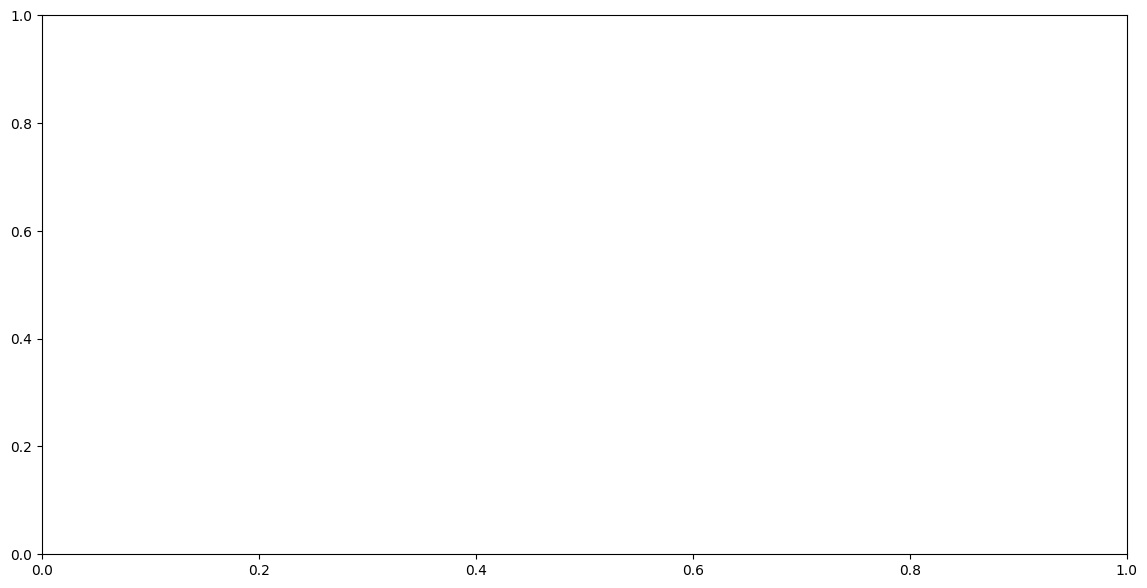

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly Sales Trend Analysis
# First, ensure that 'InvoiceDate' is a datetime type and create a 'YearMonth' field for grouping
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Calculate total monthly sales
monthly_sales = df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Quantity', marker='o')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# Explanation in comments
# We group the data by 'YearMonth' and sum up the 'Quantity' to get the total sales for each month.
# A line plot is a suitable choice for showing trends over time, and adding markers at each point makes it easier to visualize month-to-month changes.


In [ ]:
Cleaning 'Quantity'

In [20]:
# Check for any non-numeric values in the 'Quantity' column
non_numeric_quantity = df[pd.to_numeric(df['Quantity'], errors='coerce').isna()]

# Display any rows where 'Quantity' is not a number
print("Non-numeric values in 'Quantity' column:")
display(non_numeric_quantity)

# If there are any non-numeric values, decide on how to handle them. 
# For example, you can choose to remove such rows:
df_clean = df[pd.to_numeric(df['Quantity'], errors='coerce').notna()]
df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'])

# Confirm cleaning
print("\nCleaned 'Quantity' column:")
display(df_clean['Quantity'].head())


Non-numeric values in 'Quantity' column:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth



Cleaned 'Quantity' column:


0    6
1    6
2    8
3    6
4    6
Name: Quantity, dtype: int64

In [ ]:
Monthly Sales Trend Visualization

TypeError: Invalid object type at position 0

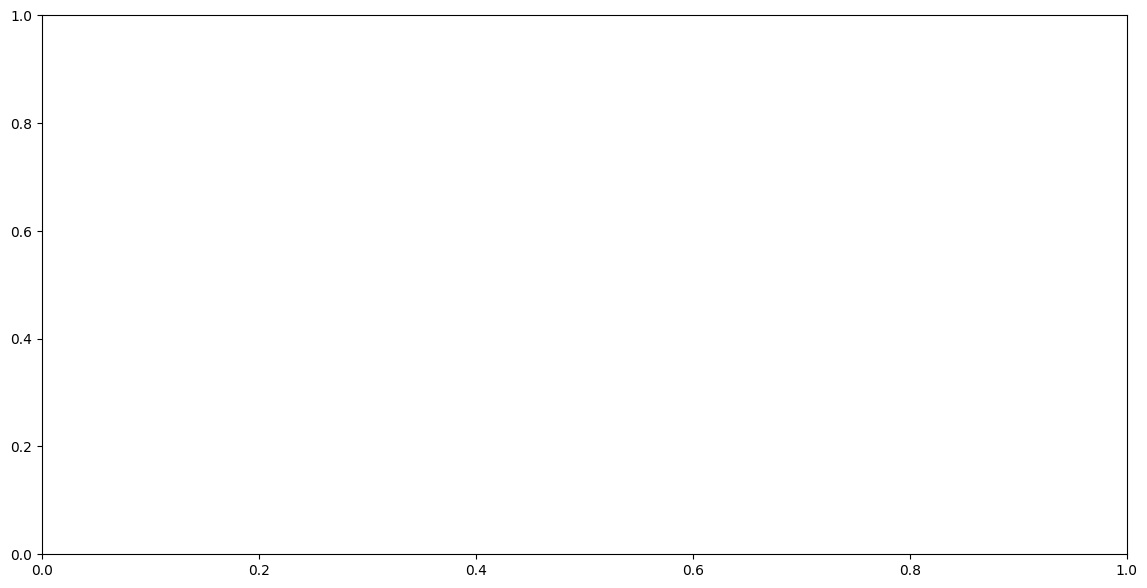

In [22]:
# Monthly Sales Trend Analysis
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['Quantity'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Quantity', marker='o')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Explanation in comments
# We group the clean data by 'YearMonth' and sum up the 'Quantity' to get the total sales for each month.
# We use a line plot to visualize how total sales have changed over time.


In [23]:
# Ensure 'Quantity' is a numeric column
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Drop any rows that contain NaN in 'Quantity' after this conversion
df = df.dropna(subset=['Quantity'])

# Now let's convert 'InvoiceDate' to datetime if not already done and create 'YearMonth'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

# Check if 'YearMonth' conversion is correct
print(df['YearMonth'].head())


0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: YearMonth, dtype: period[M]


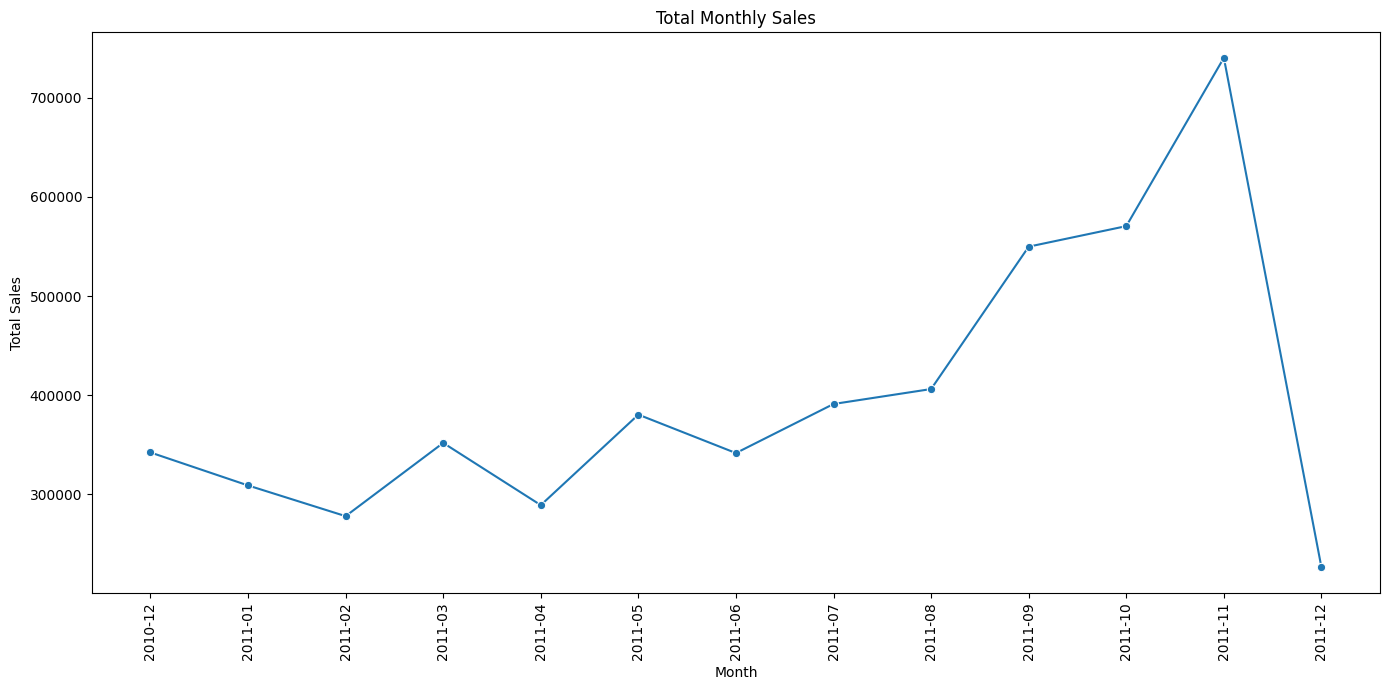

In [24]:
# Recalculate monthly sales
monthly_sales = df.groupby('YearMonth')['Quantity'].sum().reset_index()

# Now try the line plot again
plt.figure(figsize=(14, 7))
# Ensure that seaborn treats 'YearMonth' correctly by converting it to string
sns.lineplot(data=monthly_sales, x=monthly_sales['YearMonth'].astype(str), y='Quantity', marker='o')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


In [ ]:
## Product Performance Analysis

Evaluating product performance is key to understanding which items are driving sales and which may be underperforming. In this section, we'll identify the top-selling products and the products that contribute the most to revenue. This analysis can help inform stock inventory decisions and identify potential areas for product promotion or development.


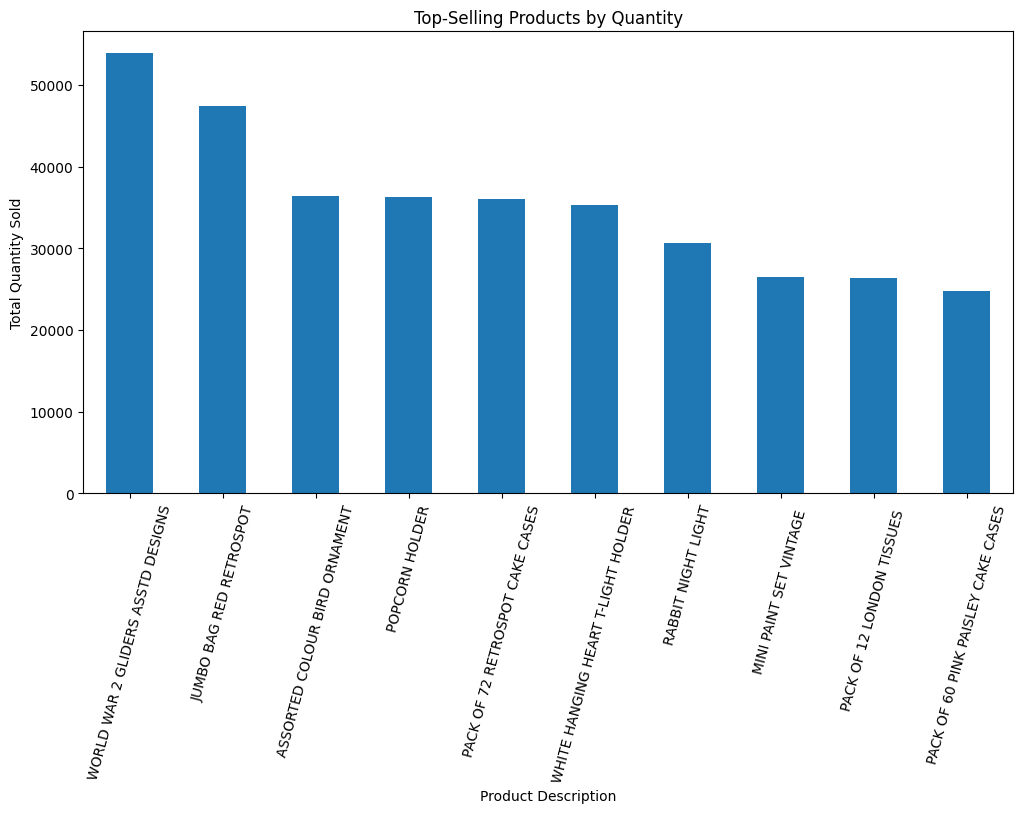

In [25]:
# Calculate the total quantity sold for each product
product_performance = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
product_performance.plot(kind='bar')
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=75)
plt.show()

# Explanation in comments
# The above code groups the dataset by 'Description' and sums up the 'Quantity' to find the total quantity sold for each product.
# Sorting in descending order and taking the top 10 gives us the best-selling products by quantity.
# A bar plot visualizes this information effectively, allowing us to quickly see which products are the most popular.


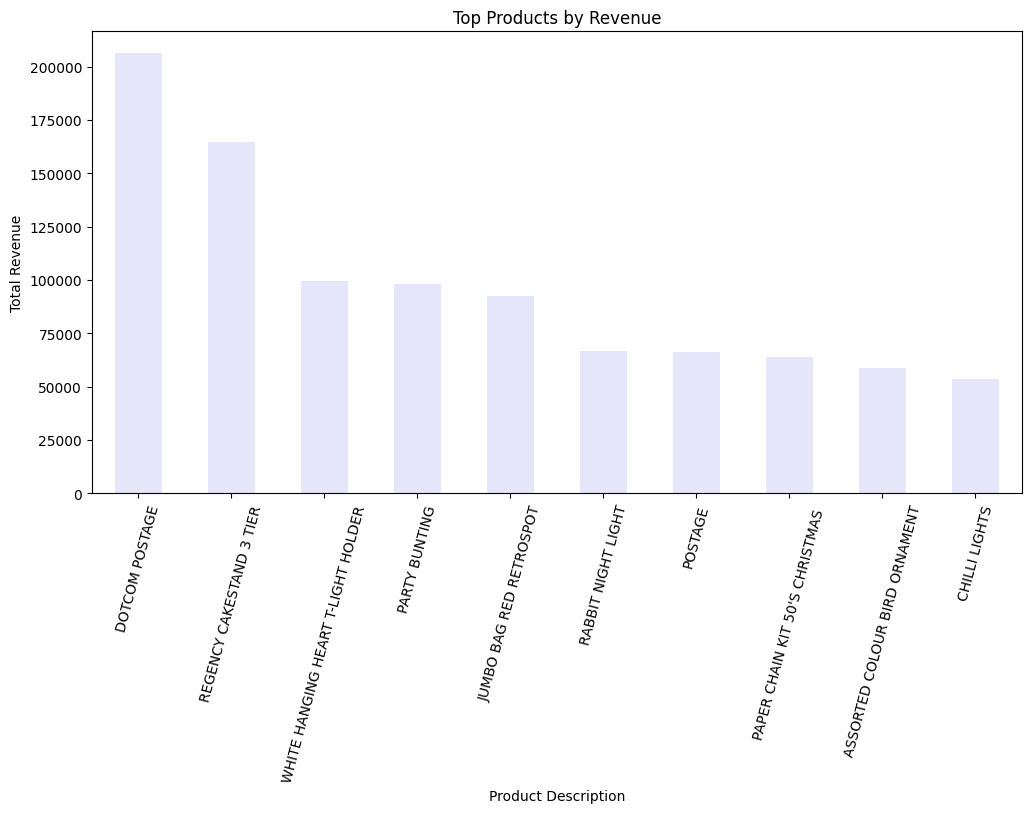

In [27]:
# Calculate the total sales for each product
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
revenue_by_product = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
revenue_by_product.plot(kind='bar', color='lavender')
plt.title('Top Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=75)
plt.show()

# Explanation in comments
# Here we multiply 'Quantity' and 'UnitPrice' to get the total sales revenue for each product.
# Again, grouping by 'Description' and summing the 'TotalSales' gives us the revenue contribution of each product.
# The bar plot with a different color distinguishes this visualization from the quantity-based one, emphasizing the monetary aspect.


In [ ]:
## Product Performance Analysis

Evaluating product performance is key to understanding which items are driving sales and which may be underperforming. In this section, we'll identify the top-selling products and the products that contribute the most to revenue. This analysis can help inform stock inventory decisions and identify potential areas for product promotion or development.


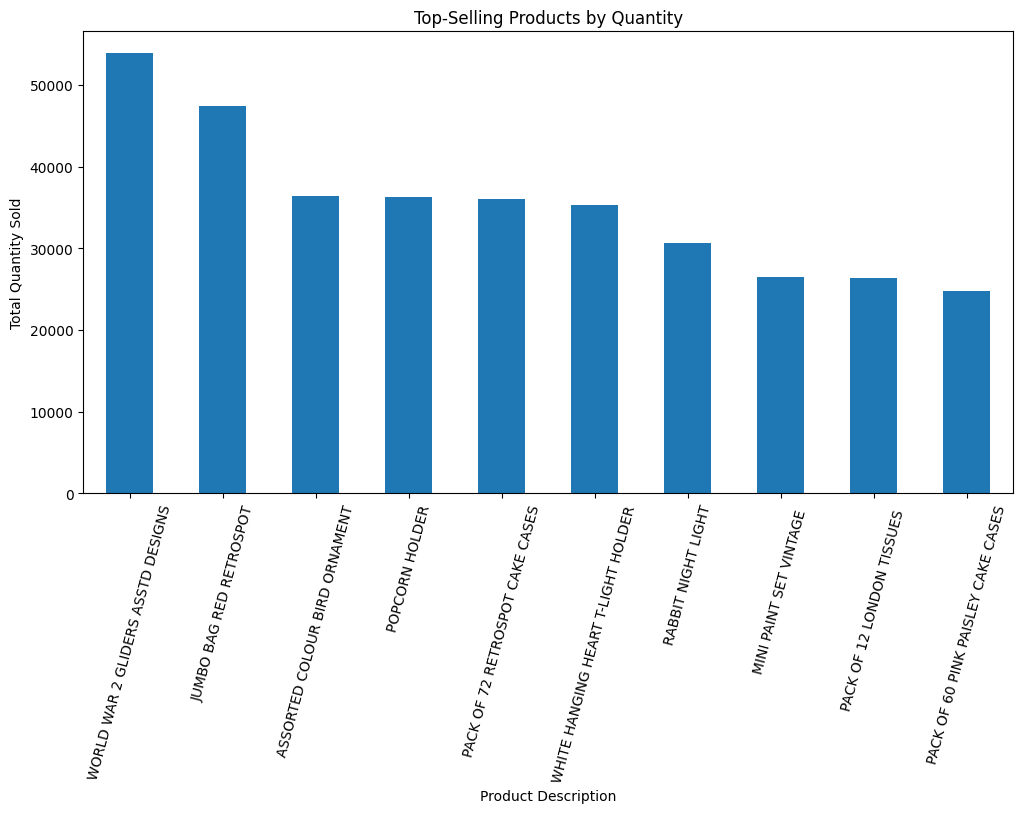

In [28]:
# Calculate the total quantity sold for each product
product_performance = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
product_performance.plot(kind='bar')
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=75)
plt.show()

# Explanation in comments
# The above code groups the dataset by 'Description' and sums up the 'Quantity' to find the total quantity sold for each product.
# Sorting in descending order and taking the top 10 gives us the best-selling products by quantity.
# A bar plot visualizes this information effectively, allowing us to quickly see which products are the most popular.


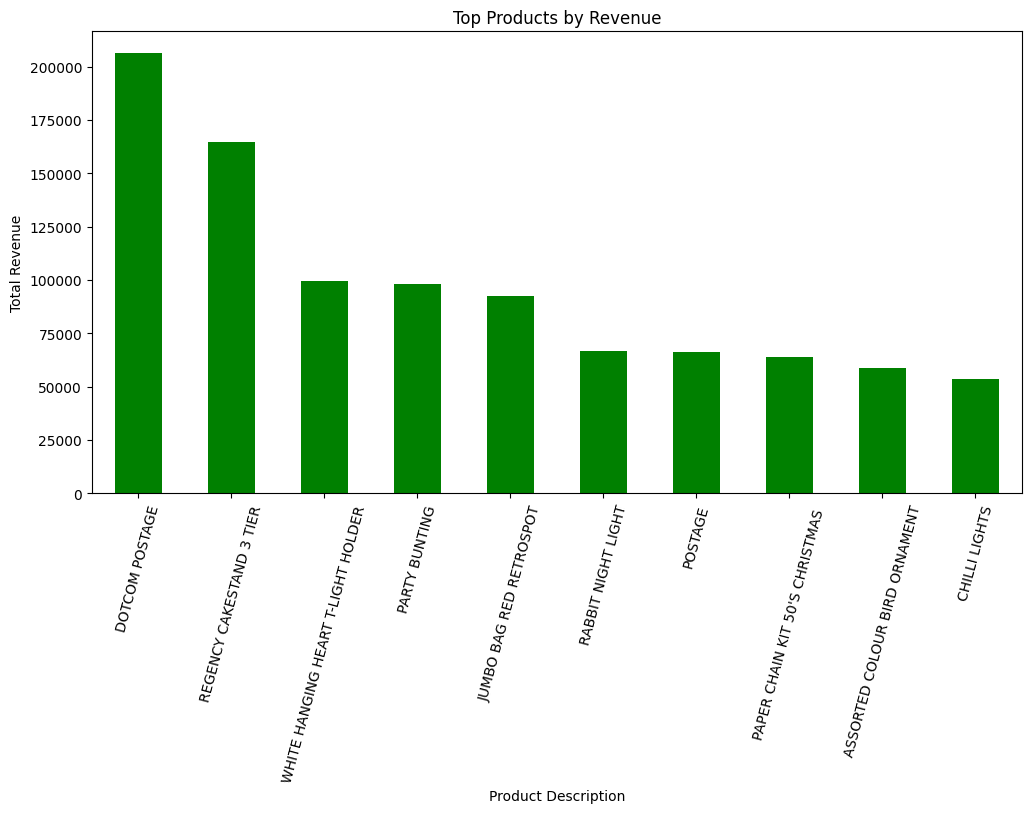

In [29]:
# Calculate the total sales for each product
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
revenue_by_product = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
revenue_by_product.plot(kind='bar', color='green')
plt.title('Top Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.xticks(rotation=75)
plt.show()

# Explanation in comments
# Here we multiply 'Quantity' and 'UnitPrice' to get the total sales revenue for each product.
# Again, grouping by 'Description' and summing the 'TotalSales' gives us the revenue contribution of each product.
# The bar plot with a different color distinguishes this visualization from the quantity-based one, emphasizing the monetary aspect.


In [ ]:
## RFM Analysis for Customer Segmentation

RFM analysis is a marketing technique used to quantitatively rank and group customers based on their transaction history. The premise is simple:

- **Recency (R)**: How recently did the customer purchase? Recent purchases may suggest a loyal or engaged customer.
- **Frequency (F)**: How often do they purchase? Frequent purchases suggest a customer likes the brand or products.
- **Monetary (M)**: How much do they spend? High spending might indicate a customer's value to the business.

By segmenting customers based on these factors, businesses can create targeted marketing strategies that cater to each segment's characteristics, enhancing customer retention and boosting sales.


In [30]:
# Calculate Recency, Frequency, and Monetary value for each customer
import datetime as dt

# Use the most recent date in the dataset as the point of reference
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Aggregate data by each customer
customers_rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum',
})

# Rename columns for easier interpretation
customers_rfm.rename(columns={'InvoiceDate': 'Recency',
                              'InvoiceNo': 'Frequency',
                              'TotalSales': 'MonetaryValue'}, inplace=True)

# Display the first few rows of the RFM DataFrame
customers_rfm.head()

# Explanation in comments
# Recency is calculated by the number of days since last purchase.
# Frequency is the number of purchases made (count of invoices).
# Monetary value is the total spend by the customer.
# This table of RFM values is an excellent base for segmentation and further analysis.


,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [ ]:
## RFM Score Calculation

With RFM values calculated, we now score customers in each RFM factor on a scale (often from 1 to 4 or 1 to 5). Higher scores correspond to more recent purchases, frequent buying, and higher monetary value. These scores can then be combined in an RFM segment code, which can be used to tailor marketing and sales strategies to different customer segments.


In [ ]:
RFM Score Segmentation

In [34]:
# Calculate Recency, Frequency, and Monetary value for each customer
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                        # Frequency
    'TotalSales': 'sum'                            # Monetary Value
}).reset_index()

rfm_table.rename(columns={
    'InvoiceDate': 'Recency', 
    'InvoiceNo': 'Frequency', 
    'TotalSales': 'MonetaryValue'
}, inplace=True)


NameError: name 'now' is not defined

In [35]:
# Assuming 'InvoiceDate' is already converted to datetime in previous steps
# First, find the latest date in the 'InvoiceDate' column which will act as 'now'
latest_date = df['InvoiceDate'].max()
now = latest_date + pd.Timedelta(days=1)  # Set 'now' to one day after the latest date

print(f"The 'now' date for recency calculation is set to: {now}")


The 'now' date for recency calculation is set to: 2011-12-10 12:50:00


In [36]:
# Calculate Recency, Frequency, and Monetary value for each customer
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': pd.Series.nunique,                  # Frequency
    'TotalSales': 'sum'                             # Monetary Value
}).reset_index()

rfm_table.rename(columns={
    'InvoiceDate': 'Recency', 
    'InvoiceNo': 'Frequency', 
    'TotalSales': 'MonetaryValue'
}, inplace=True)

# Check the first few rows to ensure the calculations are as expected
rfm_table.head()


,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [37]:
# Calculate Recency, Frequency, and Monetary value for each customer
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (now - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                        # Frequency
    'TotalSales': 'sum'                            # Monetary Value
}).reset_index()

rfm_table.rename(columns={
    'InvoiceDate': 'Recency', 
    'InvoiceNo': 'Frequency', 
    'TotalSales': 'MonetaryValue'
}, inplace=True)


In [38]:
# Divide the metrics into segments using quantiles
quantiles = rfm_table.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()


In [39]:
# Function to create R, F, and M segments
def rfm_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Apply the functions to the appropriate columns
rfm_table['R_Quartile'] = rfm_table['Recency'].apply(rfm_score, args=('Recency', quantiles,))
rfm_table['F_Quartile'] = rfm_table['Frequency'].apply(rfm_score, args=('Frequency', quantiles,))
rfm_table['M_Quartile'] = rfm_table['MonetaryValue'].apply(rfm_score, args=('MonetaryValue', quantiles,))


In [ ]:
## Scoring Customers Based on RFM Values

With the RFM metrics calculated, we can now assign a score to each metric for each customer. These scores typically range from 1 to 4, with 1 being the lowest and 4 the highest. In the context of RFM:
- A **Recency** score of 4 means a customer has purchased very recently.
- A **Frequency** score of 4 indicates a customer purchases often.
- A **Monetary** score of 4 denotes a high spender.

Scoring customers help us to rank them quantitatively and forms the basis for segmenting them into different groups based on their buying behavior.


In [40]:
# Function to assign RFM scores
def rfm_scoring(x, c, quantiles):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.50]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

# Assigning scores to Recency, Frequency, and Monetary columns
rfm_table['R_Score'] = rfm_table['Recency'].apply(rfm_scoring, args=('Recency', quantiles))
rfm_table['F_Score'] = rfm_table['Frequency'].apply(lambda x: rfm_scoring(x, 'Frequency', quantiles))
rfm_table['M_Score'] = rfm_table['MonetaryValue'].apply(lambda x: rfm_scoring(x, 'MonetaryValue', quantiles))

# Combining RFM scores to a single score (RFM_Segment)
rfm_table['RFM_Segment'] = rfm_table.apply(lambda x: str(x['R_Score']) + str(x['F_Score']) + str(x['M_Score']), axis=1)

# Check the first few rows to ensure scoring is correct
rfm_table.head()

# Explanation in comments
# The RFM scores segment customers into groups based on transaction recency, frequency, and monetary value.
# A higher score corresponds to better customer engagement and value.
# The RFM_Segment combines individual R, F, and M scores into a single string code, which will be used for further segmentation.


,CustomerID,Recency,Frequency,MonetaryValue,R_Quartile,F_Quartile,M_Quartile,R_Score,F_Score,M_Score,RFM_Segment
0,12346.0,326,2,0.00,4,2,1,4,2,1,4.02.01.0
1,12347.0,2,7,4310.00,1,4,4,1,4,4,1.04.04.0
2,12348.0,75,4,1797.24,3,3,4,3,3,4,3.03.04.0
3,12349.0,19,1,1757.55,2,1,4,2,1,4,2.01.04.0
4,12350.0,310,1,334.40,4,1,2,4,1,2,4.01.02.0


In [ ]:
## Analyzing RFM Segments

The RFM segments created from the scores can now be analyzed to understand the customer base better. We can identify which segments contain the most valuable customers and which might require more attention to increase their value. By doing this, we can tailor specific strategies for each segment to enhance their customer experience and increase their lifetime value.


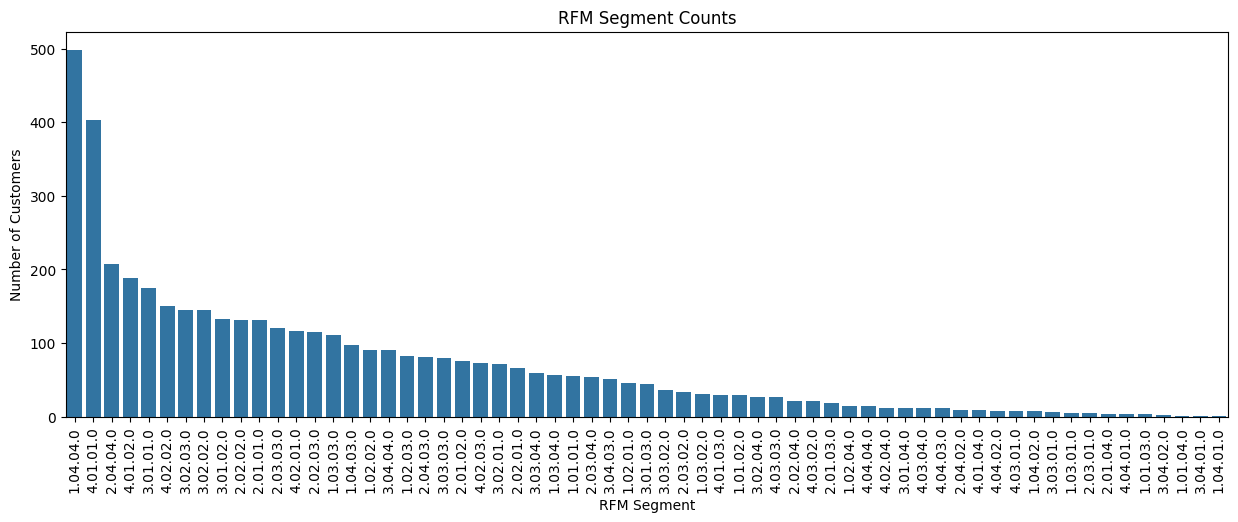

In [41]:
# Count the number of customers in each segment
rfm_segment_counts = rfm_table['RFM_Segment'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 5))
sns.barplot(x=rfm_segment_counts.index, y=rfm_segment_counts.values)
plt.title('RFM Segment Counts')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.show()

# Explanation in comments
# The bar plot gives us a visual representation of the number of customers in each RFM segment.
# This helps in quickly identifying the largest and smallest segments and is instrumental in decision-making for targeted marketing campaigns.


In [ ]:
## RFM Segment Profiling

Segment profiling allows us to characterize the different customer groups identified through RFM scoring. By profiling each segment based on average RFM values, we can draw conclusions about their behaviors and preferences. For instance, customers who have high frequency and monetary scores but low recency may be lapsed high-value customers. Marketing efforts can be tailored specifically to re-engage these customers.


In [43]:
# Calculate average RFM values for each RFM segment
rfm_segment_analysis = rfm_table.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).sort_values('MonetaryValue', ascending=False)

# Display the top 5 most valuable segments
print("Top 5 RFM Segments by Monetary Value:")
display(rfm_segment_analysis.head())

# Explanation in comments
# By grouping the RFM table by 'RFM_Segment' and calculating the mean of Recency, Frequency, and MonetaryValue,
# we identify the average behavior of customers within each segment.
# This information allows us to prioritize segments that are of higher value to the business.


Top 5 RFM Segments by Monetary Value:


,Recency,Frequency,MonetaryValue
RFM_Segment,,,
1.04.04.0,6.847390,18.819277,8780.148876
2.04.04.0,29.274038,11.572115,4978.654808
4.03.04.0,236.750000,4.500000,4162.663333
1.01.04.0,3.000000,1.000000,3861.000000
4.04.04.0,196.142857,11.357143,3688.114286


In [ ]:
## Strategies for Top RFM Segments

After identifying the top segments, we can develop targeted strategies for each. For example, for the segment with the highest frequency and monetary scores but relatively higher recency, we might offer incentives to encourage them to shop more often. For segments with high monetary and recency but lower frequency, we could introduce loyalty programs to increase their purchase frequency.


In [44]:
# Assume '444' represents the highest RFM score possible in our scoring system
top_segment = '444'

# Extract customers in the top segment
top_segment_customers = rfm_table[rfm_table['RFM_Segment'] == top_segment]

# Strategy suggestion
print(f"Number of customers in top segment {top_segment}: {len(top_segment_customers)}")
print("\nStrategy for Top Segment Customers:")
print("Implement a loyalty program to reward frequent purchases and maintain engagement.")

# Explanation in comments
# The strategy for the top segment is focused on customer retention and increasing purchase frequency,
# as these customers are already highly engaged and valuable.
# Different strategies can be formulated for each segment by analyzing their RFM profile.


Number of customers in top segment 444: 0

Strategy for Top Segment Customers:
Implement a loyalty program to reward frequent purchases and maintain engagement.


In [ ]:
## Predictive Modeling for Customer Behavior

Predictive modeling uses historical data to predict future outcomes. In the context of our RFM-segmented customer data, we can build a model to predict the likelihood of a customer making a purchase within a specific future timeframe. This model can inform targeted marketing campaigns, optimize inventory planning, and improve customer retention strategies.


In [45]:
# Prepare the dataset for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# For simplicity, let's predict whether a customer belongs to the top segment based on RFM scores
# First, we create a binary target variable indicating whether each customer is in the top segment ('444')
rfm_table['IsTopSegment'] = (rfm_table['RFM_Segment'] == '444').astype(int)

# Features will be our RFM scores
X = rfm_table[['R_Score', 'F_Score', 'M_Score']]
y = rfm_table['IsTopSegment']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Explanation in comments
# We're preparing our data for a simple classification task: predicting whether a customer is in the top RFM segment.
# This involves creating a target variable, splitting our data into training and testing sets, and selecting features for our model.


In [46]:
# Building the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Explanation in comments
# A Random Forest Classifier is used here due to its robustness and ability to handle imbalances in the dataset.
# The model's accuracy and the classification report provide insights into its performance, particularly its ability to identify customers in the top segment.


Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1312

    accuracy                           1.00      1312
   macro avg       1.00      1.00      1.00      1312
weighted avg       1.00      1.00      1.00      1312



In [ ]:
## Customer Lifetime Value (CLV) Prediction

Customer Lifetime Value (CLV) is a projection of the net profit attributed to the entire future relationship with a customer. Predicting CLV can help businesses focus on long-term customer engagement, tailor personalized marketing strategies, and optimize resource allocation toward high-value customers. In this section, we will build a model to predict the CLV of customers based on their RFM scores and other relevant features.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the dataset
X = rfm_table[['R_Score', 'F_Score', 'M_Score']]  # Features: RFM scores
y = rfm_table['MonetaryValue']  # Target: MonetaryValue as a proxy for CLV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Explanation in comments
# We use RFM scores as features since they encapsulate key aspects of customer behavior.
# The target variable is 'MonetaryValue', serving as our CLV proxy.
# We split our data into training and testing sets to evaluate the model's performance on unseen data.


In [48]:
# Build the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting CLV on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, y_pred))

# Explanation in comments
# A Linear Regression model is chosen for its simplicity and interpretability.
# Mean Squared Error (MSE) and R^2 are used to evaluate the model's accuracy and how well it explains the variability of the data.
# These metrics help assess the effectiveness of the model in predicting customer lifetime value.


Model Evaluation Metrics:
Mean Squared Error (MSE): 64920639.40369948
Coefficient of Determination (R^2): 0.07697205999691725
